# RentinBo

The aim of this project is to train a RandomForestClassifier on our dataset in order to predict in which class, or range, of euros a combination of features would fall.

## 1. Check the dataset

First of all we have to be sure that our features can be read and used by the algorithm.

In [916]:
import pandas as pd

In [917]:
dataset = pd.read_csv('ready_dataset.csv')

In [918]:
dataset = dataset.drop(columns = 'Unnamed: 0')
dataset

,tipologia,genere,zona,bagno,cucina,salotto,balcone,range euro
0,doppia,F,Murri,2,1,0,0,200-225
1,doppia,F,Marconi,2,1,1,0,225-250
2,doppia,M/F,Bolognina,1,1,1,0,250-275
3,singola,F,S.Vitale,1,1,0,1,400-425
4,singola,F,Irnerio,1,1,0,1,500-525
...,...,...,...,...,...,...,...,...
195,doppia,M,Irnerio,1,1,0,0,200-225
196,doppia,M/F,Bolognina,2,1,1,1,225-250
197,doppia,M/F,Bolognina,1,1,1,1,225-250
198,singola,M/F,San Donato,1,1,0,0,350-375


In [919]:
dataset.dtypes

tipologia     object
genere        object
zona          object
bagno          int64
cucina         int64
salotto        int64
balcone        int64
range euro    object
dtype: object

As we can see some of the values are categorical, others are numerical. RFC accepts only numerical values, so we have to do some transformation. 

## 2. Categorical features transformation

We are going to use a One Hot Encoding method for the dataframe for those features that are not numerical ('tipologia', 'genere', 'zona'). This will increase considerably the dimension of our dataset, but it is way quicker than replacing each feature in the rows manually.

In [920]:
dummy_dataset = pd.get_dummies(dataset, columns = ['tipologia', 'genere', 'zona'])
dummy_dataset

,bagno,cucina,salotto,balcone,range euro,tipologia_doppia,tipologia_singola,genere_F,genere_M,genere_M/F,...,zona_Lame,zona_Malpighi,zona_Marconi,zona_Mazzini,zona_Murri,zona_S.Ruffillo,zona_S.Viola,zona_S.Vitale,zona_Saffi,zona_San Donato
0,2,1,0,0,200-225,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,0,225-250,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,0,250-275,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,400-425,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,500-525,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,0,0,200-225,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
196,2,1,1,1,225-250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
197,1,1,1,1,225-250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
198,1,1,0,0,350-375,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Just to split the values in our dataframe  between a features array and a target array we move the 'range euro' column to the end of the dataset.

In [921]:
columns = list(dummy_dataset.columns.values)
columns.pop(columns.index('range euro')) 
dummy_dataset = dummy_dataset[columns+['range euro']]
dummy_dataset

,bagno,cucina,salotto,balcone,tipologia_doppia,tipologia_singola,genere_F,genere_M,genere_M/F,zona_Barca,...,zona_Malpighi,zona_Marconi,zona_Mazzini,zona_Murri,zona_S.Ruffillo,zona_S.Viola,zona_S.Vitale,zona_Saffi,zona_San Donato,range euro
0,2,1,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,200-225
1,2,1,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,225-250
2,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,250-275
3,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,400-425
4,1,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,500-525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,200-225
196,2,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,225-250
197,1,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,225-250
198,1,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,350-375


We can double check for correlations between features now, as we have done beafore in 'data_preparation.ipynb'.

In [922]:
import matplotlib.pyplot as plt

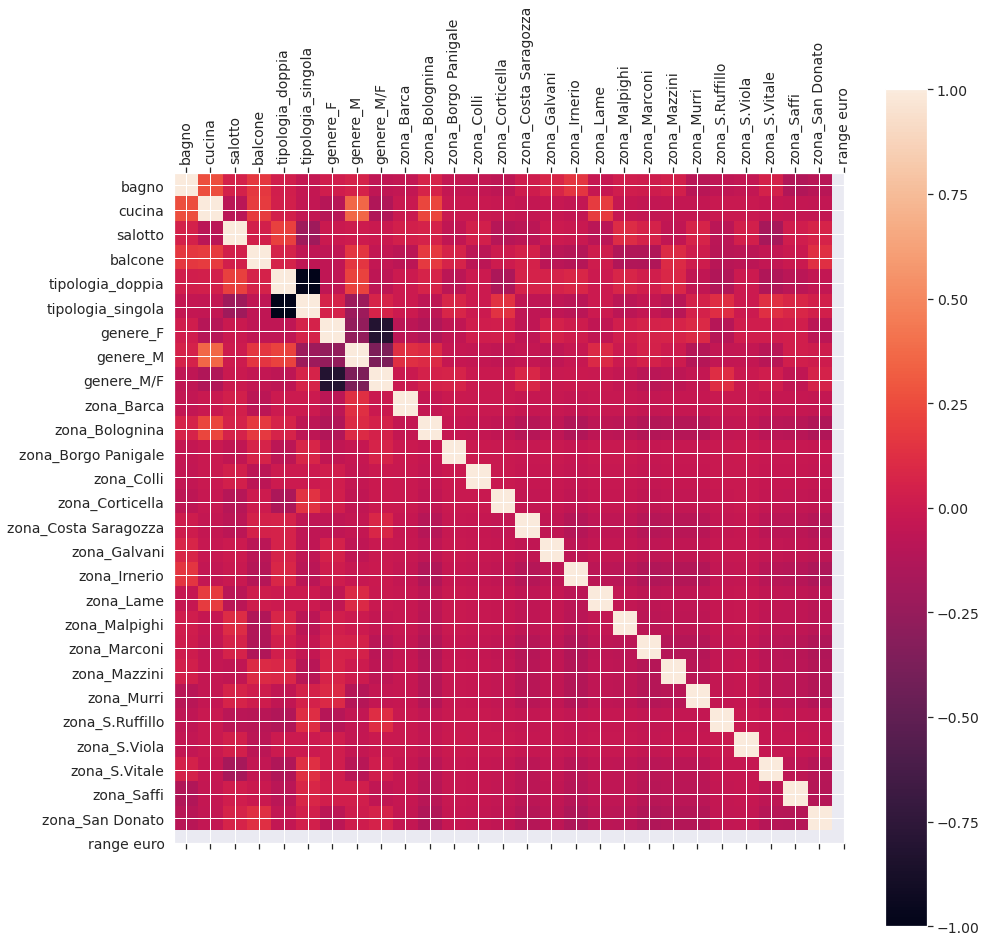

In [923]:
correlations = dummy_dataset.corr(method='pearson')
correlations
f = plt.figure(figsize=(15, 15))
plt.matshow(correlations, fignum=f.number)
plt.xticks(range(dummy_dataset.shape[1]), dummy_dataset.columns, fontsize=14, rotation=90)
plt.yticks(range(dummy_dataset.shape[1]), dummy_dataset.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

It is at least visually evident that there are not strong correlations, apart from those features like kind of bedroom and gender wich are obviously mutually excluding, thus resulting in a strong anti-correlation.

It will be interesting later to see how the 'range euro' target is correlated with features.

In [924]:
array = dummy_dataset.values
X_enc = array[:,0:27]
X_enc

array([[2, 1, 0, ..., 0, 0, 0],
       [2, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=object)

In [925]:
Y = array[:,27]
Y

array(['200-225', '225-250', '250-275', '400-425', '500-525', '250-275',
       '500-525', '450-475', '325-350', '450-475', '350-375', '275-300',
       '225-250', '350-375', '350-375', '200-225', '400-425', '225-250',
       '250-275', '275-300', '500-525', '225-250', '300-325', '250-275',
       '325-350', '400-425', '325-350', '300-325', '400-425', '250-275',
       '225-250', '450-475', '225-250', '350-375', '200-225', '300-325',
       '350-375', '275-300', '550-575', '200-225', '250-275', '250-275',
       '400-425', '400-425', '350-375', '650-675', '300-325', '275-300',
       '375-400', '350-375', '300-325', '400-425', '275-300', '225-250',
       '200-225', '400-425', '225-250', '250-275', '550-575', '300-325',
       '200-225', '450-475', '350-375', '375-400', '425-450', '275-300',
       '275-300', '300-325', '375-400', '375-400', '175-200', '375-400',
       '225-250', '350-375', '250-275', '250-275', '400-425', '400-425',
       '450-475', '450-475', '300-325', '450-475', 

## 3. Target transformation

Even the target array has to be transformed in order to pass it to the fit() function, but we are going to use a Label Encoder wich is more suited for target values.

In [926]:
from sklearn import preprocessing

In [927]:
le = preprocessing.LabelEncoder()
le.fit_transform(['175-200', '200-225', '225-250', '250-275', '275-300', '300-325', '325-350', '350-375',
                  '375-400', '400-425', '425-450', '450-475', '475-500', '500-525', '525-550', '550-575', 
                 '575-600', '600-625', '625-650', '650-675', '675-700'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [928]:
le.transform(Y)

array([ 1,  2,  3,  9, 13,  3, 13, 11,  6, 11,  7,  4,  2,  7,  7,  1,  9,
        2,  3,  4, 13,  2,  5,  3,  6,  9,  6,  5,  9,  3,  2, 11,  2,  7,
        1,  5,  7,  4, 15,  1,  3,  3,  9,  9,  7, 19,  5,  4,  8,  7,  5,
        9,  4,  2,  1,  9,  2,  3, 15,  5,  1, 11,  7,  8, 10,  4,  4,  5,
        8,  8,  0,  8,  2,  7,  3,  3,  9,  9, 11, 11,  5, 11, 15,  9,  7,
        2,  9, 11,  7,  6,  3,  8,  7, 11,  6,  8,  3,  3,  4,  1,  3, 14,
        8, 10,  3,  5,  5,  6,  2,  5,  5,  6,  4,  5,  7,  5,  5, 13,  7,
        9,  9,  6, 11, 11,  3,  7,  5, 11,  2,  9,  4,  5,  3, 11, 10,  3,
        9,  1, 13,  9,  7, 13,  6,  9,  3,  6,  7,  7,  6,  3,  3,  2,  1,
       10,  6,  9,  7,  3,  3,  3,  0, 11,  5, 11,  9,  7,  2,  3,  5,  4,
        7,  2,  3,  4,  5,  4,  7,  0,  3,  3, 11,  2,  9,  9,  2,  1,  2,
        5,  7,  9,  3,  3,  6,  1,  9,  1,  2,  2,  7,  6])

In [929]:
Y_enc = le.transform(Y)

In [930]:
Y_enc

array([ 1,  2,  3,  9, 13,  3, 13, 11,  6, 11,  7,  4,  2,  7,  7,  1,  9,
        2,  3,  4, 13,  2,  5,  3,  6,  9,  6,  5,  9,  3,  2, 11,  2,  7,
        1,  5,  7,  4, 15,  1,  3,  3,  9,  9,  7, 19,  5,  4,  8,  7,  5,
        9,  4,  2,  1,  9,  2,  3, 15,  5,  1, 11,  7,  8, 10,  4,  4,  5,
        8,  8,  0,  8,  2,  7,  3,  3,  9,  9, 11, 11,  5, 11, 15,  9,  7,
        2,  9, 11,  7,  6,  3,  8,  7, 11,  6,  8,  3,  3,  4,  1,  3, 14,
        8, 10,  3,  5,  5,  6,  2,  5,  5,  6,  4,  5,  7,  5,  5, 13,  7,
        9,  9,  6, 11, 11,  3,  7,  5, 11,  2,  9,  4,  5,  3, 11, 10,  3,
        9,  1, 13,  9,  7, 13,  6,  9,  3,  6,  7,  7,  6,  3,  3,  2,  1,
       10,  6,  9,  7,  3,  3,  3,  0, 11,  5, 11,  9,  7,  2,  3,  5,  4,
        7,  2,  3,  4,  5,  4,  7,  0,  3,  3, 11,  2,  9,  9,  2,  1,  2,
        5,  7,  9,  3,  3,  6,  1,  9,  1,  2,  2,  7,  6])

We have now our X and Y encoded arrays with numerical features and targets, we are ready to train our ML algo.

## 4. Random Forest Classifier

In [931]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_enc, Y_enc, test_size = 0.13, random_state = 843)

In [932]:
X_train.shape

(174, 27)

In [933]:
Y_train.shape

(174,)

In [934]:
X_test.shape

(26, 27)

In [935]:
Y_test.shape

(26,)

In [936]:
from sklearn.ensemble import RandomForestClassifier

In [937]:
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [938]:
Y_pred = clf.predict(X_test)

In [939]:
Y_pred

array([ 9,  9,  5,  3,  4, 11, 10, 13,  3,  7,  2,  3,  9,  9,  3,  9,  3,
        1, 15, 13,  3,  9, 11,  3, 11, 11])

In [940]:
Y_test

array([ 9,  3, 14,  3,  1, 11,  9,  7,  2,  7,  2,  7,  9,  9,  2,  5,  0,
        7,  8, 11,  5,  9,  9,  3,  3, 11])

In [941]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline

In [942]:
accuracy_score(Y_test, Y_pred)

0.38461538461538464

In [943]:
accuracy = clf.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (accuracy*100.0))

Accuracy: 38.462%


<ipython-input-944-9451e410fe4a>:2: RuntimeWarning: invalid value encountered in true_divide
  matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]


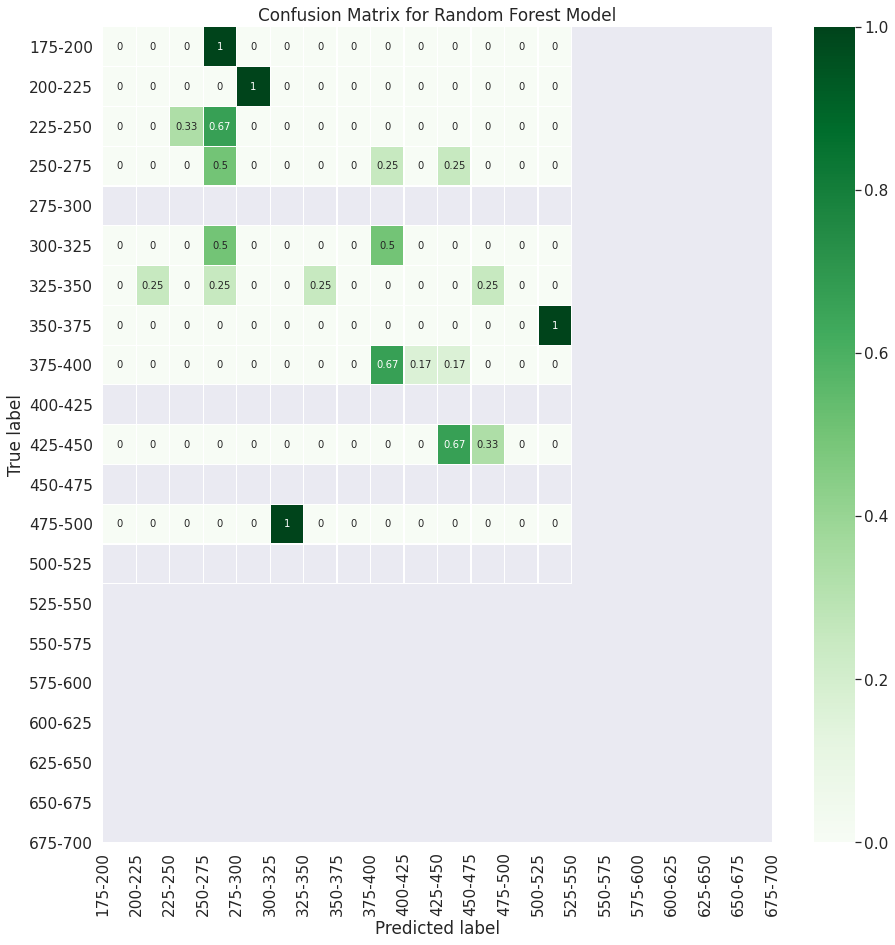

In [944]:
matrix = confusion_matrix(Y_test, Y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,15))
sn.set(font_scale=1.4)
sn.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['175-200', '200-225', '225-250', '250-275', '275-300', '300-325', '325-350', '350-375',
                  '375-400', '400-425', '425-450', '450-475', '475-500', '500-525', '525-550', '550-575', 
                 '575-600', '600-625', '625-650', '650-675', '675-700']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [945]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       1.00      0.33      0.50         3
           3       0.29      0.50      0.36         4
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         1
           9       0.67      0.67      0.67         6
          10       0.00      0.00      0.00         0
          11       0.50      0.67      0.57         3
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0

    accuracy                           0.38        26
   macro avg       0.25      0.17      0.18        26
weighted avg       0.52      0.38      0.39        26



/home/marco/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/marco/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [946]:
clf.base_estimator

DecisionTreeClassifier()

In [947]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

In [948]:
clf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 15, 19])

In [949]:
clf.n_classes_

15

In [950]:
clf.n_features_

27

In [951]:
clf.n_outputs_

1

In [952]:
clf.feature_importances_

array([0.07167737, 0.01130751, 0.10188119, 0.14037364, 0.04826787,
       0.03967836, 0.04997526, 0.02646659, 0.05632129, 0.00753559,
       0.03545725, 0.00505507, 0.01295539, 0.0121707 , 0.03766328,
       0.01672868, 0.04227816, 0.02523638, 0.02424424, 0.0412656 ,
       0.03629606, 0.03450813, 0.01380586, 0.00885179, 0.02484305,
       0.03428856, 0.04086711])

In [953]:
clf.estimators_[0].get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(max_features='auto', random_state=1608637542)>